In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay


In [27]:
df = pd.read_csv('bank.csv')
df.head()



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
print(df.columns)

# de estas columnas de dataset, las que son numericas son:
num_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
# las que son categoricas son:
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
# y la columna objetivo es: 'y' (si el cliente en si se le puede dar un depósito a plazo fijo)

# las relaciones que encontramos en si son varias, porm ejemplo de que si el cliente tiene un balance alto, es mas probable que acepte el deposito a plazo fijo. Ademas de que si ya de por si tiene prestamos, es mas dificil o menos porbable de que se le acepte tener el deposito.


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')


In [ ]:
# separamos las columnas categoiricas y numericas basandonos en su tipo de dato
categorical_cols = df.select_dtypes(include='object').columns.tolist() 
numerical_cols = df.select_dtypes(include='number').columns.tolist()

In [40]:
for col in categorical_cols:    # va a recorrer cada columna cateorica
    print(f"{col}: {df[col].unique()}") # nos muestra los valores unicos que tiene cada columna categorica

job: ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital: ['married' 'single' 'divorced']
education: ['secondary' 'tertiary' 'primary' 'unknown']
default: ['no' 'yes']
housing: ['yes' 'no']
loan: ['no' 'yes']
contact: ['unknown' 'cellular' 'telephone']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome: ['unknown' 'other' 'failure' 'success']
deposit: ['yes' 'no']


In [ ]:
# solo columnas numéricas
X_num = df[numerical_cols]
y = df['deposit'].map({'yes': 1, 'no': 0})  # lo pasamos a numero en escala binaria, para que todo este igual

# dividimos en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_num, y, test_size=0.2, random_state=42) # aca le indicamos el random state para que siempre nos de los mismos datos.

# le damos los valores de tamaño
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Accuracy: 0.7407075682937752
Precision: 0.7573839662447257
Recall: 0.6729147141518276


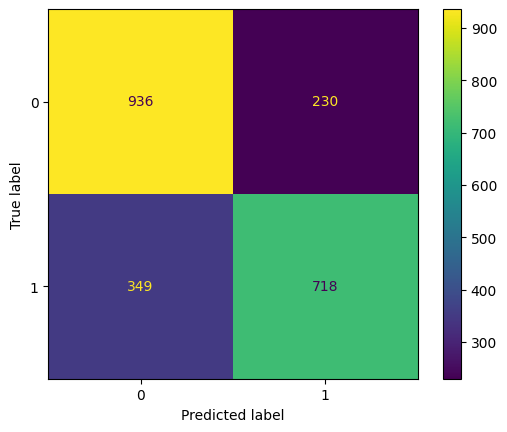

In [ ]:
# parte 1: atributos numericos


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay

# creamos y entrenamos el modelo
modelo_log = LogisticRegression()
modelo_log.fit(X_train_scaled, y_train)

# predice sobre los datos de prueba
y_pred_log = modelo_log.predict(X_test_scaled)

# mostramos metricas
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))


# Mostramos la matriz de confusion dandonos a entender en que nos equivocamos. nos quivocamos en mas falsos negativos que falsos positivos.
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log)

Accuracy: 0.7053291536050157
Precision: 0.6931067044381491
Recall: 0.6879100281162137


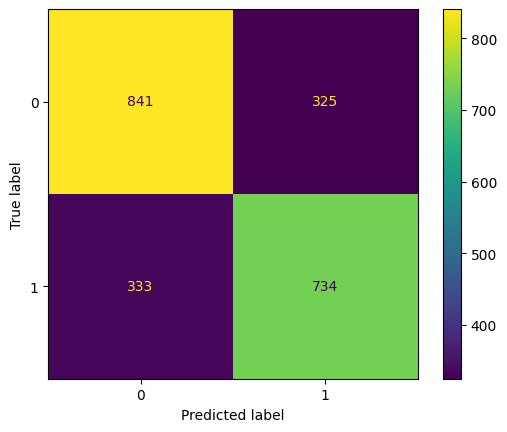

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Crear y entrenar el modelo
modelo_arbol = DecisionTreeClassifier(random_state=42)
modelo_arbol.fit(X_train_scaled, y_train)

# Predecir
y_pred_arbol = modelo_arbol.predict(X_test_scaled)

# Métricas
print("Accuracy:", accuracy_score(y_test, y_pred_arbol))
print("Precision:", precision_score(y_test, y_pred_arbol))
print("Recall:", recall_score(y_test, y_pred_arbol))


# Matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_arbol) # dentro de todo estuvo bastante parejo, nso quivocamos en mas falsos pósitivos que falsos negativos.

In [ ]:
# parte 2: numericos + categoricos
# aca al usar todas las columnas del dataset, usamos usamos un ColumnTransformer que aplica escalado a los datos numéricos y codificación one-hot a los categóricos. Al usar one hot encoding pasamos todo a una escala numérica, por lo que podemos usar todas las columnas del dataset.
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# dividimos las columnas
num_cols = df.select_dtypes(include='number').columns.tolist()
cat_cols = df.select_dtypes(include='object').drop('deposit', axis=1).columns.tolist()

# variables
X = df.drop(columns=['deposit'])
y = df['deposit'].map({'yes': 1, 'no': 0})

# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# preprocesador
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

Accuracy: 0.8078817733990148
Precision: 0.8109161793372319
Recall: 0.7797563261480788


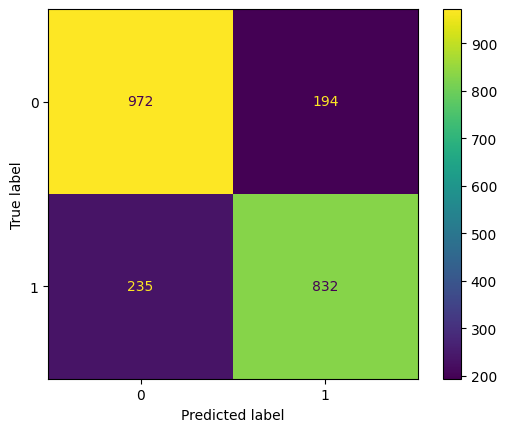

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline

# pipeline lo cual nos organiza y procesa nuetsrso datos tranfdormados
pipe_log = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# entrenar y predecir
pipe_log.fit(X_train, y_train)
y_pred_log = pipe_log.predict(X_test)

# métricas
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))

# matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log) # nos equivocamos en mas falsos negativos que falsos positivos.

Mejores parámetros: {'classifier__max_depth': 10, 'classifier__min_samples_split': 2}
Accuracy: 0.8096730855351545
Precision: 0.786096256684492
Recall: 0.8266166822867854


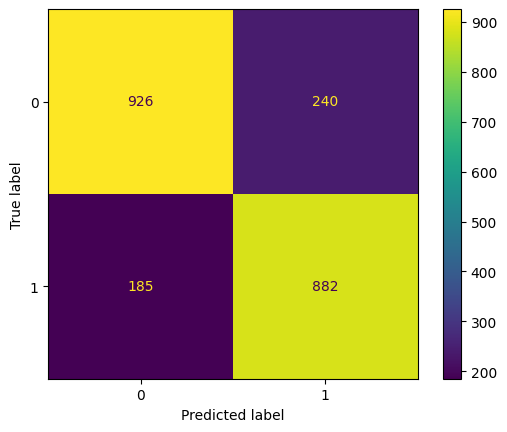

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Pipeline
pipe_tree = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Parámetros para probar
param_grid = {
    'classifier__max_depth': [3, 5, 10, 15, None],
    'classifier__min_samples_split': [2, 5, 10]
}

# GridSearch
grid_search = GridSearchCV(pipe_tree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Mejor modelo
print("Mejores parámetros:", grid_search.best_params_)

# Evaluar
best_model = grid_search.best_estimator_
y_pred_tree = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Precision:", precision_score(y_test, y_pred_tree))
print("Recall:", recall_score(y_test, y_pred_tree))

# Matriz
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree)

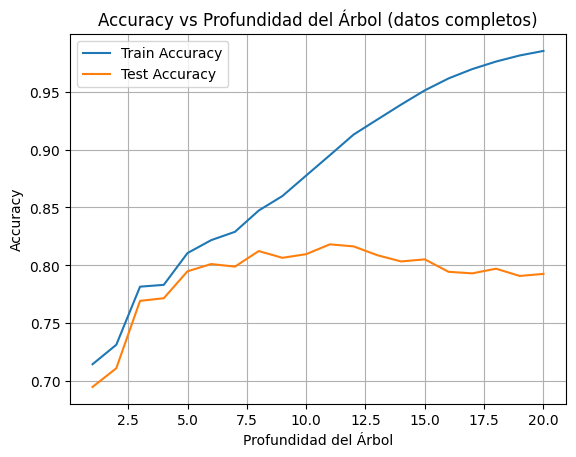

In [ ]:
# curva del accuracy para train y test en función de la profundidad del árbol.
# creamos listas vacías para guardar los resultados
train_acc = []  # accuracy en entrenamiento
test_acc = []   # accuracy en test
depths = range(1, 21)  # probamos profundidades de 1 a 20 (muy practico)

# recorremos diferentes profundidades del árbol
for d in depths:
    # Armamos un pipeline con preprocesador y árbol de decisión
    pipe = Pipeline([
        ('preprocessor', preprocessor),  # escala y codifica los datos
        ('classifier', DecisionTreeClassifier(max_depth=d, random_state=42))
    ])
    
    # Entrenamos el modelo con los datos de entrenamiento
    pipe.fit(X_train, y_train)

    # Guardamos el accuracy en entrenamiento y test
    train_acc.append(pipe.score(X_train, y_train))
    test_acc.append(pipe.score(X_test, y_test))

# Mostramos los resultados en un gráfico
plt.plot(depths, train_acc, label="Train Accuracy")  # línea de entrenamiento
plt.plot(depths, test_acc, label="Test Accuracy")    # línea de test
plt.xlabel("Profundidad del Árbol")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Profundidad del Árbol (datos completos)")
plt.legend()
plt.grid(True)
plt.show()

# entendemos que a partir de cierta profundidad la accuracy en test comienza a bajar mientras que la de entrenamiento sigue subiendo. Esto nos hace entender  que el modelo está aprendiendo demasiado bien los detalles y el ruido del conjunto de entrenamiento, perdiendo capacidad de generalización para datos nuevos. O dicho de optra manera desta overfitteando.

Accuracy: 0.8414688759516346
Precision: 0.8140969162995595
Recall: 0.865979381443299


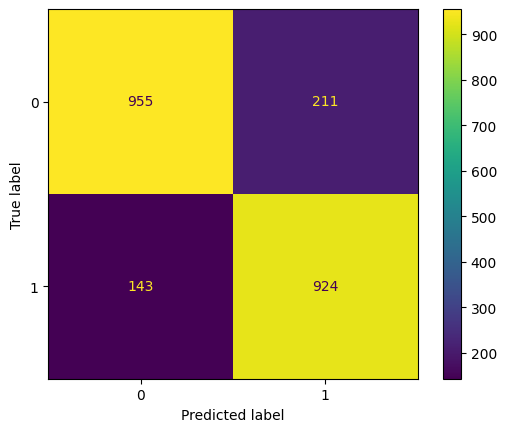

In [ ]:
# bonus
from sklearn.ensemble import RandomForestClassifier

pipe_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

pipe_rf.fit(X_train, y_train)
y_pred_rf = pipe_rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
# nos equivocamos en mas falsos negativos que falsos positivos, pero en menor cantidad que los otros modelos. Haciendo qu este mas efectivpo de todos los modelos que probamos.